titanic mortality predictions

## Exploration

In [482]:
import numpy as np
import pandas as pd

train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")


In [483]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [484]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


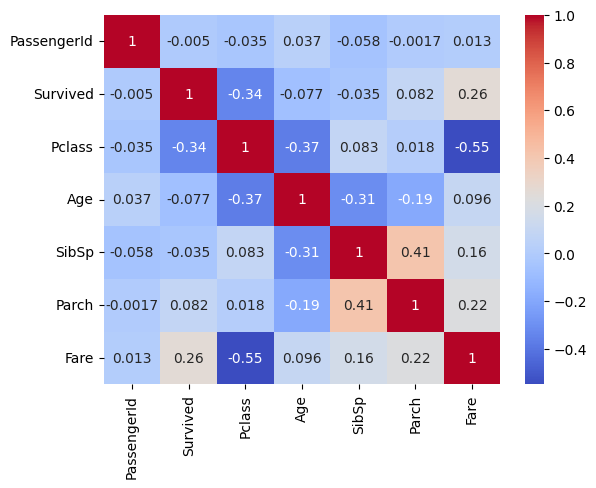

In [485]:
# investigating correlation in just the numeric columns
import seaborn as sns
import matplotlib.pyplot as plt

# get the numeric columns
numeric_df = train_data.select_dtypes(include=['float64', 'int64'])

sns.heatmap(numeric_df.corr(), cmap='coolwarm', annot=True)
plt.show()

In [486]:
from sklearn.model_selection import StratifiedShuffleSplit

# split trainign data before using test set
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2)

for train_index, test_index in split.split(train_data, train_data[["Survived", "Pclass", "Sex"]]):
    strat_train_set = train_data.loc[train_index]
    strat_test_set = train_data.loc[test_index]

In [487]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 700 to 720
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          573 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Cabin        159 non-null    object 
 11  Embarked     710 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 72.3+ KB


In [488]:
# checking missing values
def display_missing_columns(df):
    print("Columns with missing values:")
    for col in df.columns:
        missing_count = df[col].isnull().sum()
        if missing_count > 0:
            print(f'{col} column missing values: {missing_count}')
    print('\n')

display_missing_columns(strat_train_set)

Columns with missing values:
Age column missing values: 139
Cabin column missing values: 553
Embarked column missing values: 2




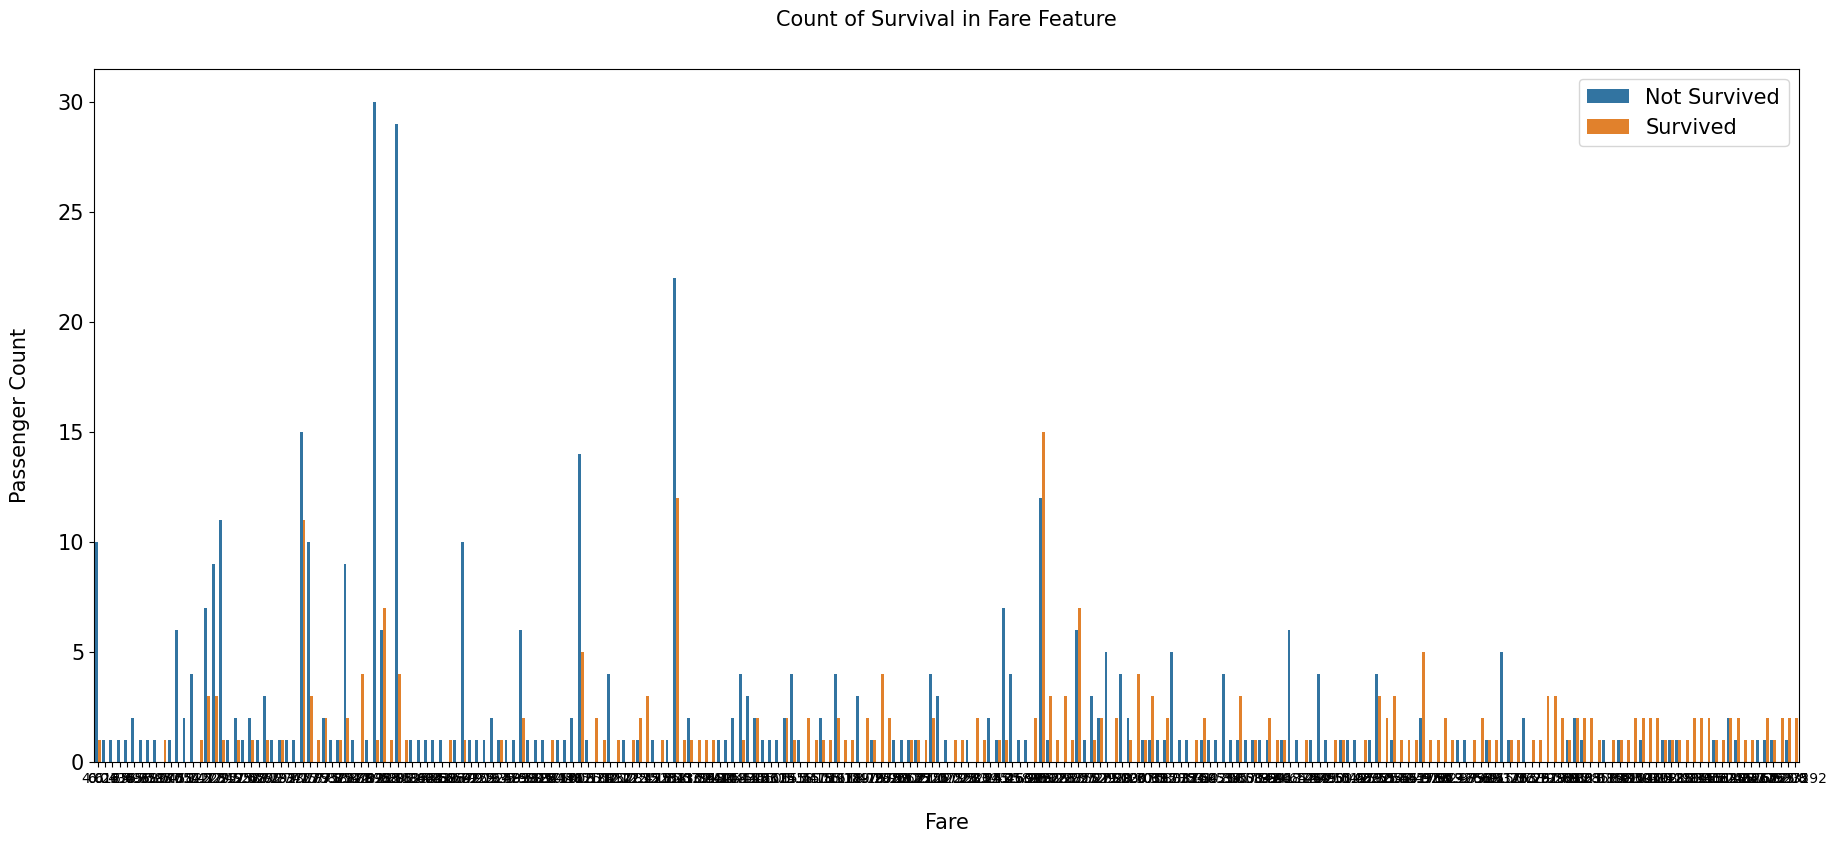

In [489]:
fig, axs = plt.subplots(figsize=(22, 9))
sns.countplot(x='Fare', hue='Survived', data=strat_train_set)

plt.xlabel('Fare', size=15, labelpad=20)
plt.ylabel('Passenger Count', size=15, labelpad=20)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=15)

plt.legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 15})
plt.title('Count of Survival in {} Feature'.format('Fare'), size=15, y=1.05)

plt.show()

# shows way too many bins so..


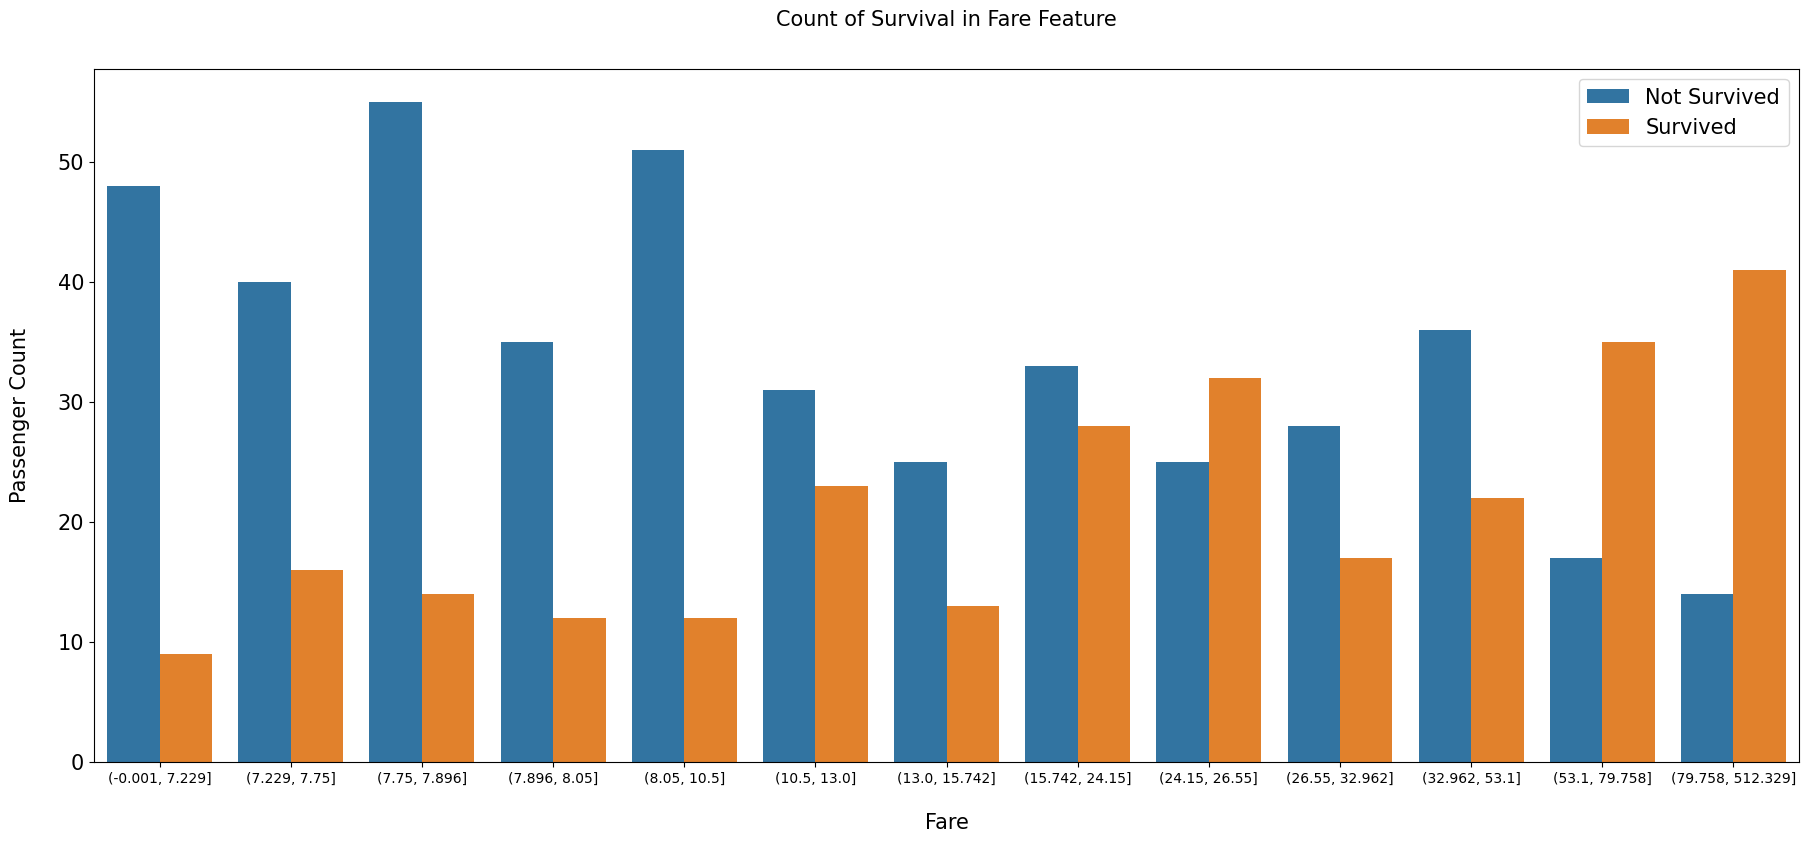

In [490]:
# group them into 13 categories
strat_train_set['Fare'] = pd.qcut(strat_train_set['Fare'], 13)

fig, axs = plt.subplots(figsize=(22, 9))
sns.countplot(x='Fare', hue='Survived', data=strat_train_set)

plt.xlabel('Fare', size=15, labelpad=20)
plt.ylabel('Passenger Count', size=15, labelpad=20)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=15)

plt.legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 15})
plt.title('Count of Survival in {} Feature'.format('Fare'), size=15, y=1.05)

plt.show()

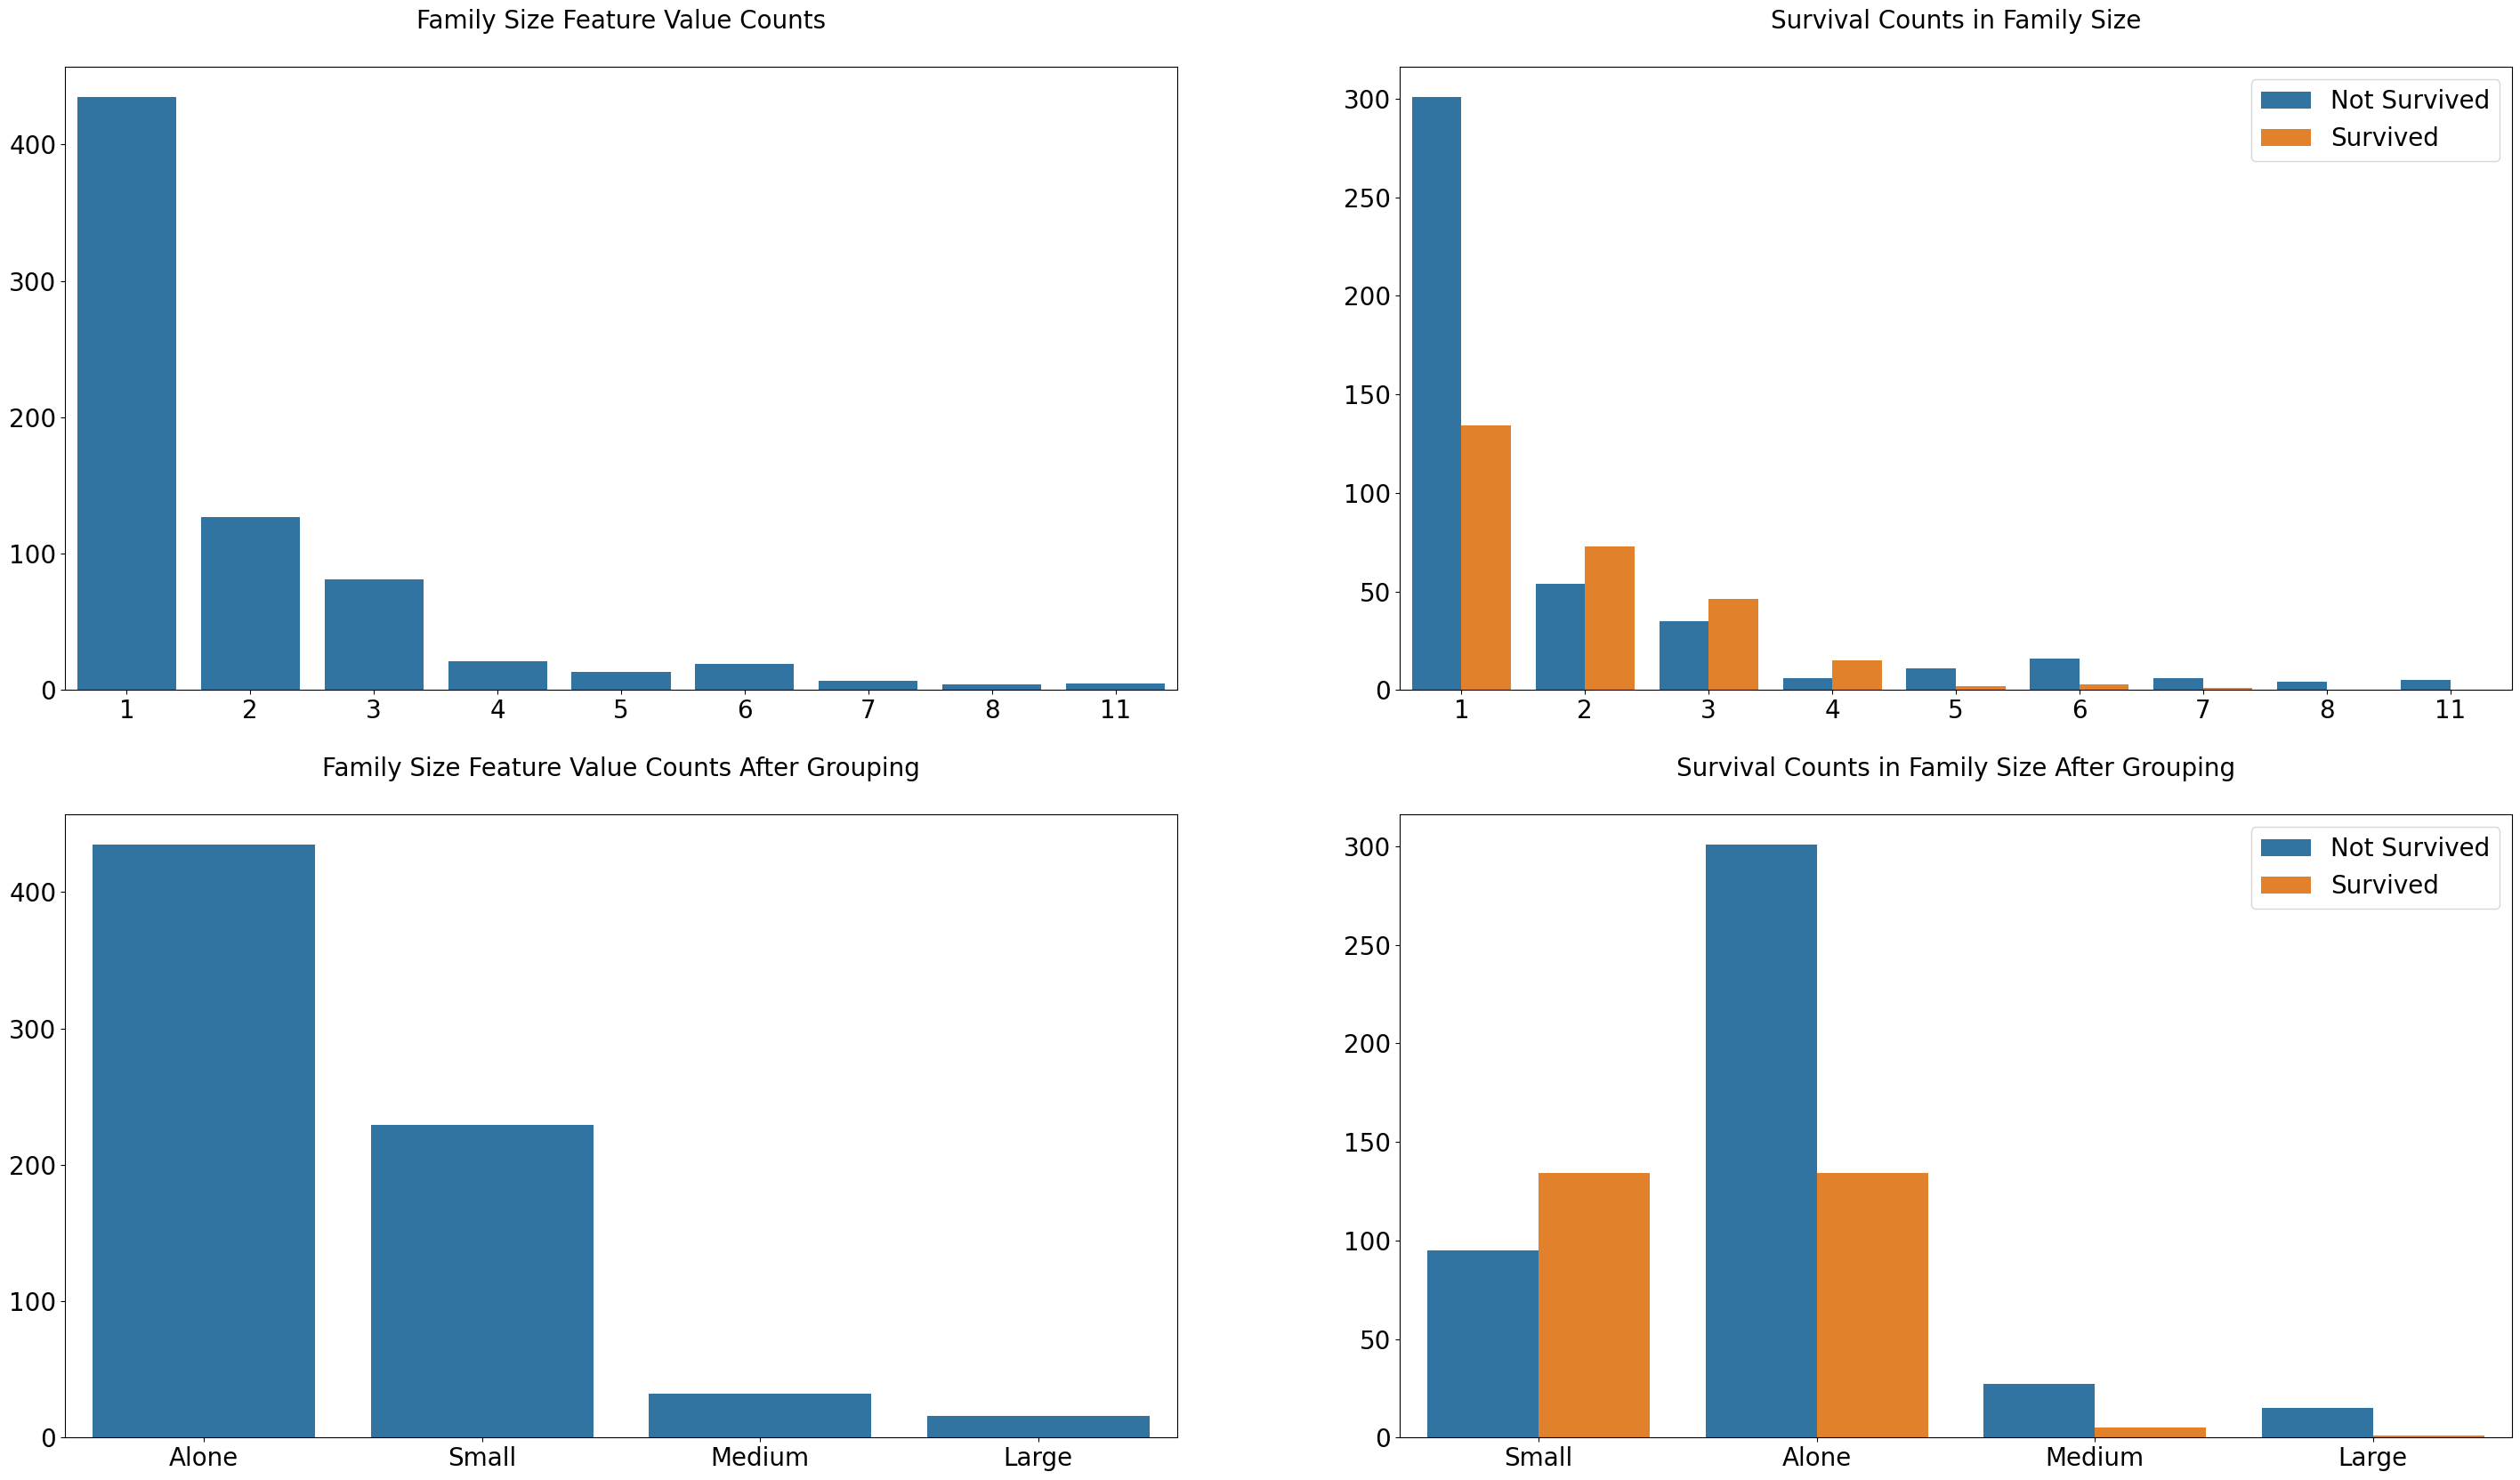

In [491]:
# Calculate a new column 'Family_Size' by adding 'SibSp', 'Parch', and 1 (for the passenger)
strat_train_set['Family_Size'] = strat_train_set['SibSp'] + strat_train_set['Parch'] + 1

# Set up the plotting area
fig, axs = plt.subplots(figsize=(20, 20), ncols=2, nrows=2)
plt.subplots_adjust(right=1.5)

# Plot the value counts of 'Family_Size'
sns.barplot(x=strat_train_set['Family_Size'].value_counts().index,
            y=strat_train_set['Family_Size'].value_counts().values, ax=axs[0][0])
axs[0][0].set_title('Family Size Feature Value Counts', size=20, y=1.05)

# Plot the survival counts based on 'Family_Size'
sns.countplot(x='Family_Size', hue='Survived', data=strat_train_set, ax=axs[0][1])
axs[0][1].set_title('Survival Counts in Family Size', size=20, y=1.05)

# Map 'Family_Size' to grouped categories
family_map = {1: 'Alone', 2: 'Small', 3: 'Small', 4: 'Small', 5: 'Medium', 6: 'Medium', 7: 'Large', 8: 'Large', 11: 'Large'}
strat_train_set['Family_Size_Grouped'] = strat_train_set['Family_Size'].map(family_map)

# Plot the value counts of the new grouped family sizes
sns.barplot(x=strat_train_set['Family_Size_Grouped'].value_counts().index,
            y=strat_train_set['Family_Size_Grouped'].value_counts().values, ax=axs[1][0])
axs[1][0].set_title('Family Size Feature Value Counts After Grouping', size=20, y=1.05)

# Plot survival counts for the grouped family size
sns.countplot(x='Family_Size_Grouped', hue='Survived', data=strat_train_set, ax=axs[1][1])
axs[1][1].set_title('Survival Counts in Family Size After Grouping', size=20, y=1.05)

# Customise a bit
for i in range(2):
    axs[i][1].legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 20})
    for j in range(2):
        axs[i][j].tick_params(axis='x', labelsize=20)
        axs[i][j].tick_params(axis='y', labelsize=20)
        axs[i][j].set_xlabel('')
        axs[i][j].set_ylabel('')

plt.show()


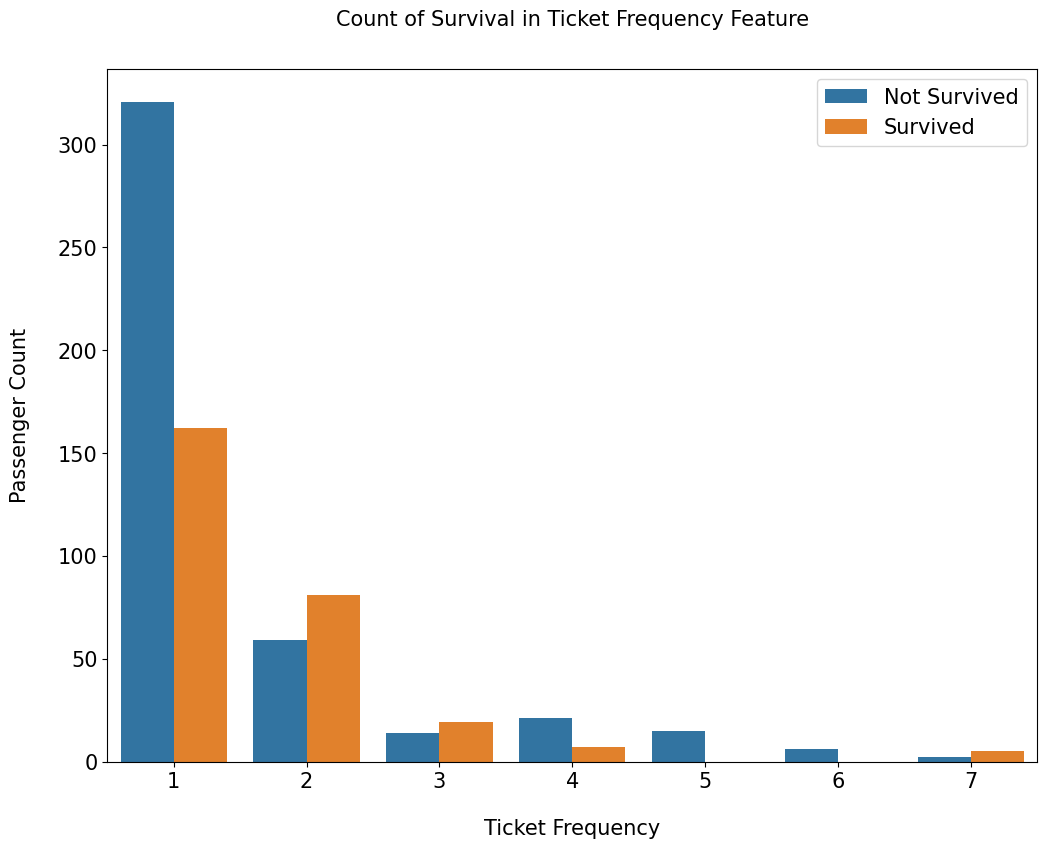

In [492]:
# According to the graphs, groups with 2,3 and 4 members had a higher survival rate.
# Passengers who travel alone has the lowest survival rate. 
# After 4 group members, survival rate decreases drastically. 

# so let's group them into ticket frequency to show this
strat_train_set['Ticket_Frequency'] = strat_train_set.groupby('Ticket')['Ticket'].transform('count')

fig, axs = plt.subplots(figsize=(12, 9))
sns.countplot(x='Ticket_Frequency', hue='Survived', data=strat_train_set)

plt.xlabel('Ticket Frequency', size=15, labelpad=20)
plt.ylabel('Passenger Count', size=15, labelpad=20)
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)

plt.legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 15})
plt.title('Count of Survival in {} Feature'.format('Ticket Frequency'), size=15, y=1.05)

plt.show()

## Pipeline

In [493]:
# Buidling the pipeline

# deal with missing values
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer

# replace null values with missing values in Age
# based on the median age of groups defined by Sex and Pclass
class AgeImputer(BaseEstimator, TransformerMixin):
    def __init__(self):
        # Storing median ages
        self.age_medians = {}

    def fit(self, X, y=None):
        # Calculate median ages for each combination of Sex and Pclass
        self.age_medians = X.groupby(['Sex', 'Pclass'])['Age'].median().to_dict()
        return self
    
    def transform(self, X):
        # for each Sex and Pclass group
        for (sex, pclass), median_age in self.age_medians.items():
            # Apply median age to the specific group where Age is NaN
            condition = (X['Sex'] == sex) & (X['Pclass'] == pclass)
            X.loc[condition & X['Age'].isna(), 'Age'] = median_age
        return X
    
        

In [494]:
# label encoder
# convert to numerical type with LabelEncoder.
from sklearn.preprocessing import LabelEncoder

class MultiColumnLabelEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, features):
        self.features = features  # List of columns to encode
        self.encoders = {feature: LabelEncoder() for feature in features}

    def fit(self, X, y=None):
        # Fit a LabelEncoder for each column in the dataset
        for feature in self.features:
            self.encoders[feature].fit(X[feature])
        return self

    def transform(self, X):
        # Apply the fitted encoder to the dataset
        for feature in self.features:
            X[feature] = self.encoders[feature].transform(X[feature])
        return X

    def fit_transform(self, X, y=None):
        self.fit(X, y)
        return self.transform(X)


In [495]:
# one hot encoder
from sklearn.preprocessing import OneHotEncoder

class FeatureEncoder(BaseEstimator, TransformerMixin):
    def __init__(self):
        # Initialise one encoder that can be reused for multiple columns
        self.encoder_embarked = OneHotEncoder(categories=[['C', 'Q', 'S']], handle_unknown='ignore')
        self.encoder_sex = OneHotEncoder(categories=[['male', 'female']], handle_unknown='ignore')
    
    def fit(self, X, y=None):
        self.encoder_embarked.fit(X[['Embarked']])
        self.encoder_sex.fit(X[['Sex']])
        return self
    
    def transform(self, X):
        # Transform 'Embarked'
        embarked_encoded = self.encoder_embarked.transform(X[['Embarked']]).toarray()
        embarked_cols = ['Embarked_C', 'Embarked_Q', 'Embarked_S']
        
        # Transform 'Sex'
        sex_encoded = self.encoder_sex.transform(X[['Sex']]).toarray()
        sex_cols = ['Sex_male', 'Sex_female']
        
        # Add encoded columns back
        X[embarked_cols] = embarked_encoded
        X[sex_cols] = sex_encoded
        
        return X


In [496]:
# drop non important features and features that have been processed already
class FeatureDropper(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        # return X.drop(drop_cols, axis=1, errors='ignore')
        return X.drop(["Name", "Embarked", "Ticket", "Cabin", "Sex", "N"], axis=1, errors='ignore')

In [497]:
# assemble the pipeline
from sklearn.pipeline import Pipeline

non_numeric_features = ['Embarked', 'Sex', 'Family_Size_Grouped', 'Age', 'Fare']

pipeline = Pipeline([
    ("AgeImputer", AgeImputer()),
    ("FeatureEncoder", FeatureEncoder()),
    ("MultiLabelEncoder", MultiColumnLabelEncoder(non_numeric_features)),
    ("FeatureDropper", FeatureDropper()),
])

In [498]:
# run the pipeline on the stratified training set
pipeline_train_set = pipeline.fit_transform(strat_train_set)


In [499]:
pipeline_train_set.head()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Family_Size,Family_Size_Grouped,Ticket_Frequency,Embarked_C,Embarked_Q,Embarked_S,Sex_male,Sex_female
700,701,1,1,23,1,0,12,2,3,3,1.0,0.0,0.0,0.0,1.0
746,747,0,3,21,1,1,7,3,3,2,0.0,0.0,1.0,1.0,0.0
394,395,1,3,31,0,2,7,3,3,1,0.0,0.0,1.0,0.0,1.0
864,865,0,2,31,0,0,5,1,0,1,0.0,0.0,1.0,1.0,0.0
701,702,1,1,47,0,0,8,1,0,1,0.0,0.0,1.0,1.0,0.0


In [500]:
# checking again for missing values
display_missing_columns(pipeline_train_set)

Columns with missing values:




## Model

In [501]:
# scale date before training
from sklearn.preprocessing import StandardScaler

X = pipeline_train_set.drop("Survived", axis=1)
Y = pipeline_train_set["Survived"]

scaler = StandardScaler()
x_data = scaler.fit_transform(X)
y_data = Y.to_numpy()

print('X_train shape: {}'.format(x_data.shape))
print('y_train shape: {}'.format(y_data.shape))


X_train shape: (712, 14)
y_train shape: (712,)


In [502]:
# Training the model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

classifier = RandomForestClassifier(random_state=42)
param_grid = [
    {'n_estimators': [10, 100, 200, 500],
     'max_depth': [None, 5, 10],
     'min_samples_split': [2, 3, 4]}
]

grid_search = GridSearchCV(classifier, param_grid, cv=3, scoring='accuracy', return_train_score=True)
grid_search.fit(x_data, y_data)

# Attemplting to find best settings
# Best parameter set
print('Best parameters:', grid_search.best_params_)
print('Best cross-validated score (accuracy):', grid_search.best_score_)

# Results for all the parameter combinations
import pandas as pd
results = pd.DataFrame(grid_search.cv_results_)
print(results[['param_n_estimators', 'param_max_depth', 'param_min_samples_split', 'mean_test_score', 'mean_train_score']])

In [ ]:
# get best paramters
final_classifier = grid_search.best_estimator_

In [ ]:
final_classifier

RandomForestClassifier(max_depth=10, min_samples_split=3, random_state=42)

In [ ]:
# run on test set and score
# some grouping and processing required
strat_test_set['Fare'] = pd.qcut(strat_test_set['Fare'], 13)
strat_test_set['Family_Size'] = strat_test_set['SibSp'] + strat_test_set['Parch'] + 1
strat_test_set['Family_Size_Grouped'] = strat_test_set['Family_Size'].map(family_map)
strat_test_set['Ticket_Frequency'] = strat_test_set.groupby('Ticket')['Ticket'].transform('count')

pipeline_test_set = pipeline.fit_transform(strat_test_set)


ValueError: invalid literal for int() with base 10: 'C'

In [ ]:
pipeline_test_set.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Family_Size,Family_Size_Grouped,Ticket_Frequency,Embarked_C,Embarked_Q,Embarked_S,Sex_male,Sex_female
291,292,1,1,15,1,0,11,NaN,0,2,1.0,0.0,0.0,0.0,1.0
767,768,0,3,27,0,0,1,NaN,0,1,0.0,1.0,0.0,0.0,1.0
386,387,0,3,3,5,2,10,NaN,0,2,0.0,0.0,1.0,1.0,0.0
346,347,1,2,38,0,0,5,NaN,0,1,0.0,0.0,1.0,0.0,1.0
141,142,1,3,18,0,0,1,NaN,0,1,0.0,0.0,1.0,0.0,1.0


In [ ]:
X = pipeline_test_set.drop("Survived", axis=1)
Y = pipeline_test_set["Survived"]

x_test_data = scaler.transform(X)
y_test_data = Y.to_numpy()


In [ ]:
final_classifier.score(x_test_data, y_test_data)

0.7653631284916201

In [478]:
# now to run it on the full data
# some grouping and processing required
train_data['Fare'] = pd.qcut(train_data['Fare'], 13)
train_data['Family_Size'] = train_data['SibSp'] + train_data['Parch'] + 1
train_data['Family_Size_Grouped'] = train_data['Family_Size'].map(family_map)
train_data['Ticket_Frequency'] = train_data.groupby('Ticket')['Ticket'].transform('count')

pipeline_train_data = pipeline.fit_transform(train_data)

In [170]:
X_final = pipeline_train_data.drop("Survived", axis=1)
Y_final = pipeline_train_data["Survived"]

x_final_data = scaler.fit_transform(X_final)
y_final_data = Y_final.to_numpy()

final_classifier.fit(x_final_data, y_final_data)

RandomForestClassifier(min_samples_split=4)

In [171]:
# output predictions to csv
final_test_data = pipeline.fit_transform(test_data)

In [172]:
x_final_test = final_test_data
x_final_test = x_final_test.fillna(method='ffill')

x_final_test_data = scaler.transform(x_final_test)

/var/folders/s3/h_lpz7853xx43bm0p8lh9gfw0000gn/T/ipykernel_24510/3361664540.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  x_final_test = x_final_test.fillna(method='ffill')


In [173]:
predictions = final_classifier.predict(x_final_test_data)

In [174]:
predictions_df = pd.DataFrame(test_data['PassengerId'])
predictions_df['Survived'] = predictions
predictions_df.to_csv("predictions.csv", index=False)